In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from keras import metrics
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
intrusion = pd.read_csv('E:\\SELVA PROJECTS\\2023-2024\\PYTHON PROJECTS\\BE PROJECTS\\ABT_TBM_313 INTRUSION\\DATA.csv')

In [3]:
intrusion .head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [4]:
intrusion .shape

(82332, 45)

In [5]:
intrusion ["label"].value_counts()

1    45332
0    37000
Name: label, dtype: int64

In [6]:
intrusion .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [7]:
intrusion .describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [8]:
intrusion .columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [9]:
intrusion ['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [10]:
data_0,data_1 =intrusion ['label'].value_counts()[0] / len(intrusion .index),intrusion ['label'].value_counts()[1] / len(intrusion .index)


print("In data: there are {} % of class 0 and {} % of class 1".format(data_0,data_1))


In data: there are 0.44939999028324346 % of class 0 and 0.5506000097167566 % of class 1


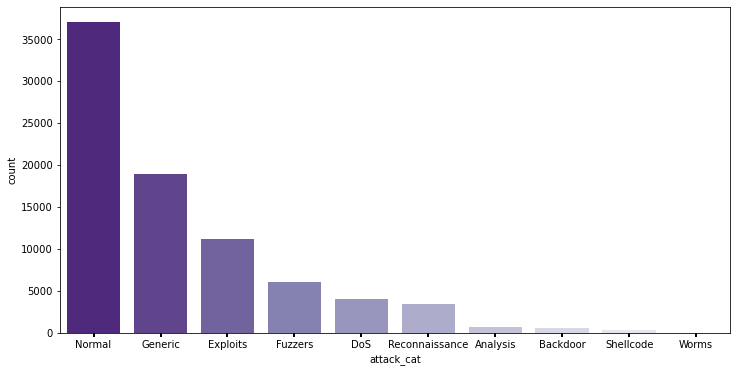

In [11]:
f, axes = plt.subplots( figsize=(12,6))
sns.countplot(x="attack_cat", data=intrusion , order = intrusion ['attack_cat'].value_counts().index, palette='Purples_r',ax=axes)
axes.tick_params('x',width=2,labelsize=10)

In [12]:
intrusion .isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

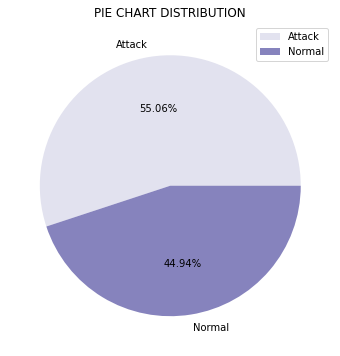

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
label_counts = intrusion['label'].value_counts()
labels = ['Attack', 'Normal']
colors = plt.cm.Purples([0.2, 0.6]) 

plt.pie(label_counts, labels=labels, autopct='%0.2f%%', colors=colors)
plt.title("PIE CHART DISTRIBUTION")
plt.legend(labels, loc="upper right") 
plt.show()


In [14]:
intrusion ['proto'].value_counts()

tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: proto, Length: 131, dtype: int64

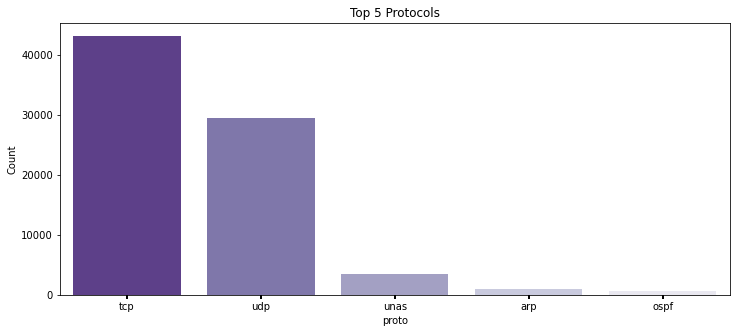

In [15]:
top_protocols = intrusion['proto'].value_counts().nlargest(5).index
f, axes = plt.subplots(figsize=(12, 5))
sns.countplot(x="proto", data=intrusion, order=top_protocols, palette='Purples_r', ax=axes)
axes.tick_params('x', width=2, labelsize=10)
axes.set_title('Top 5 Protocols')
axes.set_xlabel('proto')
axes.set_ylabel('Count')
plt.show()

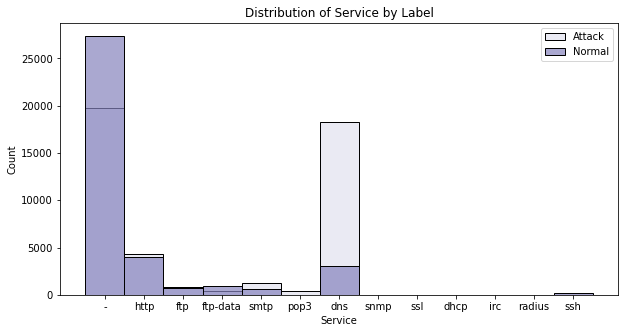

In [16]:
plt.figure(figsize=(10, 5))
colors = plt.cm.Purples([0.2, 0.6])
sns.histplot(intrusion[intrusion['label'] == 1]['service'], color=plt.cm.Purples([0.2]), label='Attack', alpha=0.7)
sns.histplot(intrusion[intrusion['label'] == 0]['service'], color=plt.cm.Purples([0.6]), label='Normal', alpha=0.7)
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Service by Label')
plt.legend()
plt.show()

In [17]:
intrusion .drop(['id','attack_cat'],axis=1,inplace=True)

In [18]:
# Clamp extreme Values
data = intrusion .select_dtypes(include=[np.number])
data.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [19]:
data = intrusion .select_dtypes(include=[np.number])
data_before = data.copy()
DEBUG = 0
for feature in data.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(data[feature].nunique()))
        print(data[feature].nunique()>50)
   
    if data[feature].nunique()>50:
        if data[feature].min()==0:
            intrusion [feature] = np.log(intrusion [feature]+1)
        else:
            intrusion [feature] = np.log(intrusion [feature])

data= intrusion .select_dtypes(include=[np.number])

In [20]:
df_cat = intrusion .select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [21]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(intrusion [feature].isin(intrusion [feature].value_counts().head().index)))
       
    if df_cat[feature].nunique()>6:
        intrusion [feature] = np.where(intrusion [feature].isin(intrusion [feature].value_counts().head().index), intrusion [feature], '-')

In [22]:
df_cat = intrusion .select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


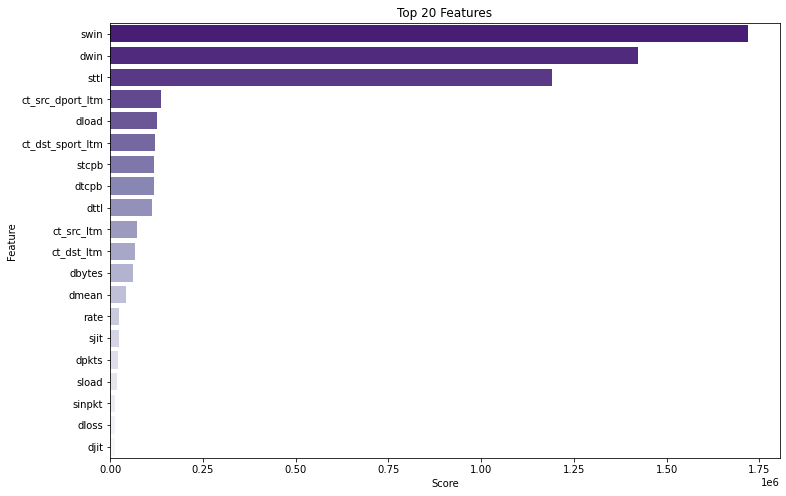

In [23]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = intrusion.iloc[:, 4:-2]
y = intrusion.iloc[:, -1]

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)

df_scores = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(X.columns)

feature_score = pd.concat([df_col, df_scores], axis=1)
feature_score.columns = ['feature', 'score']

top_features = feature_score.nlargest(20, 'score')

plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='feature', data=top_features, palette='Purples_r')
plt.title('Top 20 Features')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()


In [24]:
intrusion=intrusion.drop(['proto','service','state'], axis=1)

In [25]:
x =intrusion.drop(['label'], axis=1)
y =intrusion['label']

In [26]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x = ms.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(57632, 39) (24700, 39)


In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [29]:
y_train = np.array(y_train)

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [31]:
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

lstm = Sequential()

lstm.add(LSTM(50, input_shape=(None, 39), return_sequences=True))

lstm.add(LSTM(50, return_sequences=True))

lstm.add(LSTM(50))

lstm.add(Dense(128, activation='relu'))

lstm.add(Dense(64, activation='relu'))

lstm.add(Dense(1, activation='sigmoid'))


In [33]:
lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 50)          18000     
                                                                 
 lstm_1 (LSTM)               (None, None, 50)          20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 73,249
Trainable params: 73,249
Non-traina

In [35]:
start = time.time()
history = lstm.fit(X_train, y_train, 
                   epochs=200, 
                   batch_size=2000, 
                   validation_data=(X_test, y_test),
                   verbose=2)
end_train = time.time()


Epoch 1/200
29/29 - 10s - loss: 0.6831 - accuracy: 0.5490 - val_loss: 0.6521 - val_accuracy: 0.6816 - 10s/epoch - 330ms/step
Epoch 2/200
29/29 - 1s - loss: 0.5696 - accuracy: 0.7135 - val_loss: 0.5177 - val_accuracy: 0.7437 - 1s/epoch - 48ms/step
Epoch 3/200
29/29 - 1s - loss: 0.4898 - accuracy: 0.7558 - val_loss: 0.4660 - val_accuracy: 0.7635 - 1s/epoch - 48ms/step
Epoch 4/200
29/29 - 1s - loss: 0.4067 - accuracy: 0.7891 - val_loss: 0.3373 - val_accuracy: 0.8432 - 1s/epoch - 48ms/step
Epoch 5/200
29/29 - 1s - loss: 0.3111 - accuracy: 0.8627 - val_loss: 0.2922 - val_accuracy: 0.8735 - 1s/epoch - 48ms/step
Epoch 6/200
29/29 - 1s - loss: 0.2688 - accuracy: 0.8853 - val_loss: 0.2551 - val_accuracy: 0.8907 - 1s/epoch - 48ms/step
Epoch 7/200
29/29 - 1s - loss: 0.2321 - accuracy: 0.9063 - val_loss: 0.2185 - val_accuracy: 0.9085 - 1s/epoch - 48ms/step
Epoch 8/200
29/29 - 1s - loss: 0.2065 - accuracy: 0.9168 - val_loss: 0.1995 - val_accuracy: 0.9169 - 1s/epoch - 48ms/step
Epoch 9/200
29/29 - 1

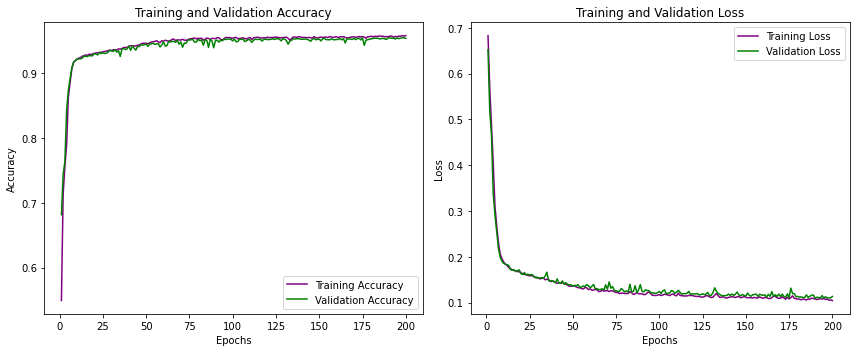

In [39]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy',color="purple")
plt.plot(epochs, val_accuracy, label='Validation Accuracy',color="green")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss',color="purple")
plt.plot(epochs, val_loss, label='Validation Loss',color="green")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
test_results = lstm.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

772/772 [==============================] - 2s 3ms/step - loss: 0.1132 - accuracy: 0.9539
Test results - Loss: 0.11322450637817383 - Accuracy: 95.388662815094%


In [41]:
y_pred =lstm.predict(X_test)
end_predict = time.time()

772/772 [==============================] - 3s 2ms/step


In [42]:
from sklearn.metrics import precision_recall_fscore_support as score
acc = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
f1s = f1_score(y_test, y_pred.round())
print("Accuracy: "+ "{:.2%}".format(acc))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['LSTM'] = [acc, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.39%
Recall: 93.95%
Precision: 97.55%
F1-Score: 95.71%
time to train: 307.52 s
time to predict: 1578.31 s
total: 1885.82 s


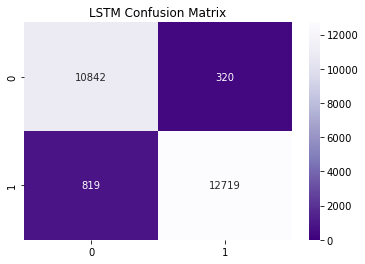

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
plt.figure(figsize=(6,4))
confusion_matrix = confusion_matrix(y_test,y_pred.round())
sns.heatmap(confusion_matrix,0, annot=True, fmt="d",cmap="Purples_r")
plt.title("LSTM Confusion Matrix")
plt.show()

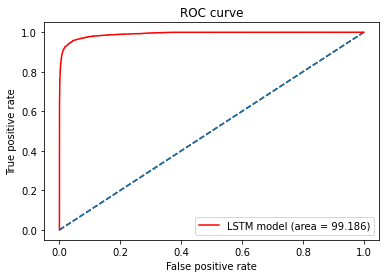

In [44]:
fpr_model1, tpr_model1, thresholds_model1 = roc_curve(y_test, y_pred, pos_label=1)
auc_model1 = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_model1, tpr_model1,color="red",label='LSTM model (area = {:.3f})'.format(auc_model1*100))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

gru = Sequential()

gru.add(GRU(50, input_shape=(None, 39), return_sequences=True))

gru.add(GRU(50, return_sequences=True))

gru.add(GRU(50))

gru.add(Dense(128, activation='relu'))

gru.add(Dense(64, activation='relu'))

gru.add(Dense(1, activation='sigmoid'))

In [46]:
gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 50)          13650     
                                                                 
 gru_1 (GRU)                 (None, None, 50)          15300     
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dense_3 (Dense)             (None, 128)               6528      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 59,099
Trainable params: 59,099
Non-trai

In [48]:
start = time.time()
history = gru.fit(X_train, y_train, 
                   epochs=200, 
                   batch_size=2000, 
                   validation_data=(X_test, y_test),
                   verbose=2)
end_train = time.time()

Epoch 1/200
29/29 - 10s - loss: 0.6255 - accuracy: 0.7187 - val_loss: 0.5280 - val_accuracy: 0.7469 - 10s/epoch - 354ms/step
Epoch 2/200
29/29 - 2s - loss: 0.4374 - accuracy: 0.7765 - val_loss: 0.3393 - val_accuracy: 0.8480 - 2s/epoch - 60ms/step
Epoch 3/200
29/29 - 2s - loss: 0.3012 - accuracy: 0.8728 - val_loss: 0.2709 - val_accuracy: 0.8895 - 2s/epoch - 54ms/step
Epoch 4/200
29/29 - 1s - loss: 0.2537 - accuracy: 0.9002 - val_loss: 0.2375 - val_accuracy: 0.9086 - 1s/epoch - 46ms/step
Epoch 5/200
29/29 - 2s - loss: 0.2295 - accuracy: 0.9123 - val_loss: 0.2176 - val_accuracy: 0.9166 - 2s/epoch - 52ms/step
Epoch 6/200
29/29 - 1s - loss: 0.2098 - accuracy: 0.9197 - val_loss: 0.2057 - val_accuracy: 0.9196 - 1s/epoch - 51ms/step
Epoch 7/200
29/29 - 1s - loss: 0.2012 - accuracy: 0.9209 - val_loss: 0.2050 - val_accuracy: 0.9182 - 1s/epoch - 44ms/step
Epoch 8/200
29/29 - 1s - loss: 0.1976 - accuracy: 0.9202 - val_loss: 0.1901 - val_accuracy: 0.9224 - 1s/epoch - 43ms/step
Epoch 9/200
29/29 - 1

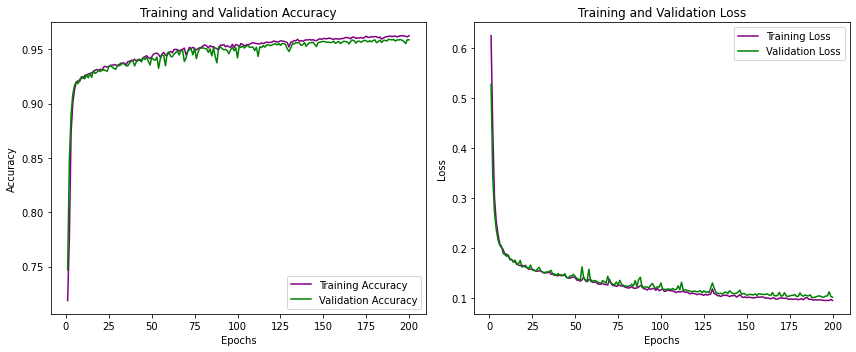

In [49]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy',color="purple")
plt.plot(epochs, val_accuracy, label='Validation Accuracy',color="green")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss',color="purple")
plt.plot(epochs, val_loss, label='Validation Loss',color="green")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
test_results = gru.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

772/772 [==============================] - 2s 3ms/step - loss: 0.1017 - accuracy: 0.9585
Test results - Loss: 0.10168840736150742 - Accuracy: 95.854252576828%


In [51]:
y_pred =gru.predict(X_test)
end_predict = time.time()

772/772 [==============================] - 4s 3ms/step


In [52]:
from sklearn.metrics import precision_recall_fscore_support as score
acc = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
f1s = f1_score(y_test, y_pred.round())
print("Accuracy: "+ "{:.2%}".format(acc))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['GRU'] = [acc, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.85%
Recall: 95.38%
Precision: 97.00%
F1-Score: 96.19%
time to train: 284.06 s
time to predict: 6.92 s
total: 290.99 s


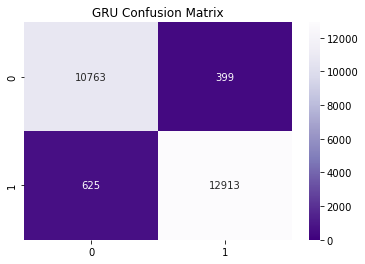

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
plt.figure(figsize=(6,4))
confusion_matrix = confusion_matrix(y_test,y_pred.round())
sns.heatmap(confusion_matrix,0, annot=True, fmt="d",cmap="Purples_r")
plt.title("GRU Confusion Matrix")
plt.show()

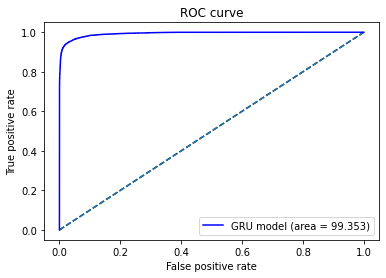

In [54]:
fpr_model2, tpr_model2, thresholds_model2 = roc_curve(y_test, y_pred, pos_label=1)
auc_model2 = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_model2, tpr_model2,color="blue",label='GRU model (area = {:.3f})'.format(auc_model2*100))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

hybrid_model = Sequential()

hybrid_model.add(LSTM(64, input_shape=(None, 39), activation='relu', return_sequences=True))

hybrid_model.add(LSTM(32, activation='relu', return_sequences=True))

hybrid_model.add(GRU(16, activation='relu'))

hybrid_model.add(Dense(256, activation='relu'))

hybrid_model.add(Dense(128, activation='relu'))

hybrid_model.add(Dense(1, activation='sigmoid'))

hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hybrid_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, None, 64)          26624     
                                                                 
 lstm_4 (LSTM)               (None, None, 32)          12416     
                                                                 
 gru_3 (GRU)                 (None, 16)                2400      
                                                                 
 dense_6 (Dense)             (None, 256)               4352      
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 78,817
Trainable params: 78,817
Non-trai

In [56]:
start = time.time()
history = hybrid_model.fit(X_train, y_train, 
                   epochs=200, 
                   batch_size=2000, 
                   validation_data=(X_test, y_test),
                   verbose=2)
end_train = time.time()

Epoch 1/200
29/29 - 8s - loss: 0.6771 - accuracy: 0.5518 - val_loss: 0.6326 - val_accuracy: 0.6683 - 8s/epoch - 276ms/step
Epoch 2/200
29/29 - 2s - loss: 0.5416 - accuracy: 0.7268 - val_loss: 0.4878 - val_accuracy: 0.7660 - 2s/epoch - 60ms/step
Epoch 3/200
29/29 - 1s - loss: 0.3915 - accuracy: 0.8219 - val_loss: 0.3100 - val_accuracy: 0.8672 - 1s/epoch - 46ms/step
Epoch 4/200
29/29 - 1s - loss: 0.2704 - accuracy: 0.8846 - val_loss: 0.2578 - val_accuracy: 0.8909 - 1s/epoch - 48ms/step
Epoch 5/200
29/29 - 1s - loss: 0.2211 - accuracy: 0.9082 - val_loss: 0.1983 - val_accuracy: 0.9184 - 1s/epoch - 50ms/step
Epoch 6/200
29/29 - 1s - loss: 0.1794 - accuracy: 0.9290 - val_loss: 0.1696 - val_accuracy: 0.9332 - 1s/epoch - 41ms/step
Epoch 7/200
29/29 - 1s - loss: 0.1594 - accuracy: 0.9384 - val_loss: 0.1595 - val_accuracy: 0.9344 - 1s/epoch - 42ms/step
Epoch 8/200
29/29 - 1s - loss: 0.1459 - accuracy: 0.9442 - val_loss: 0.1426 - val_accuracy: 0.9436 - 1s/epoch - 44ms/step
Epoch 9/200
29/29 - 1s 

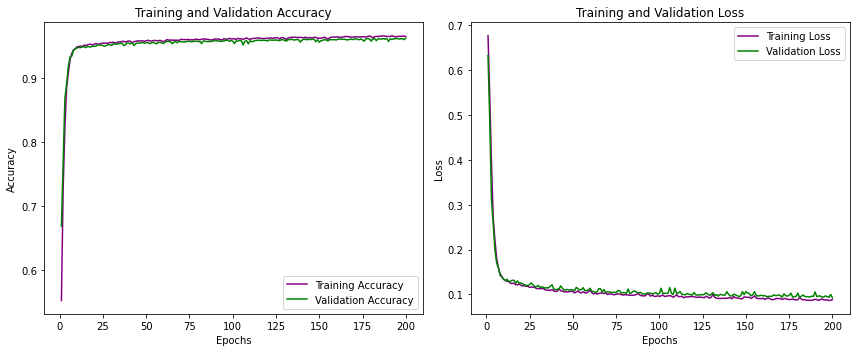

In [57]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy',color="purple")
plt.plot(epochs, val_accuracy, label='Validation Accuracy',color="green")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss',color="purple")
plt.plot(epochs, val_loss, label='Validation Loss',color="green")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [58]:
test_results = hybrid_model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

772/772 [==============================] - 2s 3ms/step - loss: 0.0924 - accuracy: 0.9623
Test results - Loss: 0.0924454778432846 - Accuracy: 96.23076915740967%


In [59]:
y_pred =hybrid_model.predict(X_test)
end_predict = time.time()

772/772 [==============================] - 3s 3ms/step


In [60]:
acc = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
f1s = f1_score(y_test, y_pred.round())
print("Accuracy: "+ "{:.2%}".format(acc))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Hybrid LSTM-GRU'] = [acc, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.23%
Recall: 96.06%
Precision: 97.03%
F1-Score: 96.54%
time to train: 273.42 s
time to predict: 6.79 s
total: 280.20 s


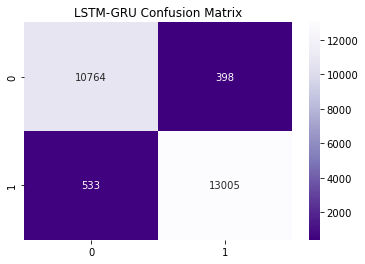

In [61]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,4))
conf_matrix = confusion_matrix(y_test, y_pred.round())
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples_r")
plt.title("LSTM-GRU Confusion Matrix")
plt.show()


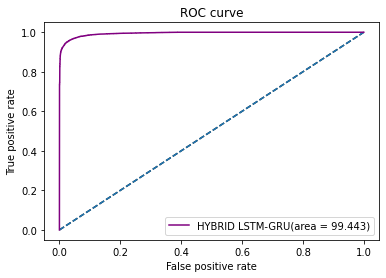

In [65]:
fpr_model3, tpr_model3, thresholds_model3 = roc_curve(y_test, y_pred)
auc_model3 = roc_auc_score(y_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_model3, tpr_model3,color='Purple',label='HYBRID LSTM-GRU(area = {:.3f})'.format(auc_model3*100))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

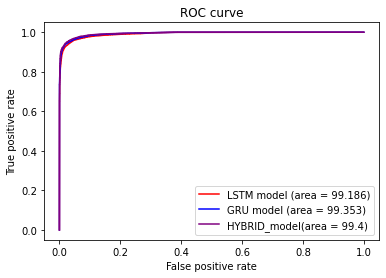

In [63]:
plt.plot(fpr_model1, tpr_model1,color="red",label='LSTM model (area = {:.3f})'.format(auc_model1*100))
plt.plot(fpr_model2, tpr_model2,color="blue",label='GRU model (area = {:.3f})'.format(auc_model2*100))
plt.plot(fpr_model3, tpr_model3,color='Purple',label='HYBRID_model(area = {:.1f})'.format(auc_model3*100))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [64]:
model_performance.style.background_gradient(cmap='Purples').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
LSTM,95.39%,93.95%,97.55%,95.71%,307.5,1578.3,1885.8
GRU,95.85%,95.38%,97.00%,96.19%,284.1,6.9,291.0
Hybrid LSTM-GRU,96.23%,96.06%,97.03%,96.54%,273.4,6.8,280.2
